# Potato Disease Classification Using Deep Learning

## 🎯 Project Overview

This notebook demonstrates how to build an **Image Classification Model** using **Deep Learning** to automatically identify diseases in potato plants. The model can classify potato leaf images into three categories:

1. **Potato___Early_blight** - A fungal disease that causes dark spots on leaves
2. **Potato___Late_blight** - A serious disease that can destroy entire crops
3. **Potato___healthy** - Healthy potato plants with no disease

## 🧠 What is Deep Learning?

**Deep Learning** is a subset of **Machine Learning** that uses artificial neural networks with multiple layers (hence "deep") to learn patterns from data. Think of it like teaching a computer to recognize patterns the same way a human brain does, but using mathematical computations.

## 🖼️ What is Computer Vision?

**Computer Vision** is a field of AI that trains computers to interpret and understand visual information from the world. In our case, we're teaching the computer to "see" and identify diseases in plant leaves.

## 🏗️ What is a Convolutional Neural Network (CNN)?

A **CNN** is a type of deep learning model specifically designed for image recognition tasks. It works by:

1. **Detecting Features**: Finding edges, shapes, and patterns in images
2. **Building Complexity**: Combining simple features to recognize complex objects
3. **Making Decisions**: Using learned features to classify images

Think of it like how you recognize a face - first you notice eyes, nose, mouth (features), then combine them to recognize the whole face.

## 📚 Libraries and Technologies Used

This project uses several powerful Python libraries:

- **TensorFlow/Keras**: Google's deep learning framework
- **Matplotlib**: For creating visualizations and plots
- **NumPy**: For numerical computations
- **IPython**: For enhanced interactive computing

---

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

## 📦 Step 1: Importing Essential Libraries

### What are Libraries?
**Libraries** are pre-written code packages that provide specific functionality. Instead of writing everything from scratch, we import libraries to use their powerful features.

### Libraries Explanation:

#### 🧠 TensorFlow
- **What it is**: An open-source machine learning framework developed by Google
- **Why we use it**: Provides tools for building and training neural networks
- **Website**: [tensorflow.org](https://www.tensorflow.org/)

#### 🎯 Keras
- **What it is**: A high-level API built on top of TensorFlow
- **Why we use it**: Makes building neural networks easier with simple, user-friendly functions
- **Key components we'll use**:
  - `models`: For creating the overall model structure
  - `layers`: Building blocks of neural networks

#### 📊 Matplotlib
- **What it is**: A plotting library for creating visualizations
- **Why we use it**: To display images, graphs, and training progress
- **Website**: [matplotlib.org](https://matplotlib.org/)

#### 💻 IPython
- **What it is**: Enhanced interactive Python environment
- **Why we use it**: For better display of outputs in Jupyter notebooks

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

## ⚙️ Step 2: Setting Hyperparameters

### What are Hyperparameters?
**Hyperparameters** are configuration settings that control how the model learns. Think of them as the "settings" or "dials" you can adjust to improve your model's performance.

### Our Hyperparameters Explained:

#### 📦 BATCH_SIZE = 32
- **What it is**: Number of images processed at once
- **Why 32**: Good balance between memory usage and training efficiency
- **Analogy**: Like studying 32 flashcards at a time instead of one by one

#### 🖼️ IMAGE_SIZE = 256
- **What it is**: All images will be resized to 256x256 pixels
- **Why standardize**: Neural networks need consistent input sizes
- **Trade-off**: Larger = more detail but slower training

#### 🎨 CHANNELS = 3
- **What it is**: Color channels (Red, Green, Blue)
- **Why 3**: RGB color images have 3 channels
- **Note**: Grayscale images would have 1 channel

#### 🔄 EPOCHS = 50
- **What it is**: Number of times the model sees the entire dataset
- **Why important**: More epochs = more learning, but risk of overfitting
- **Analogy**: Like reading a textbook 50 times to memorize it

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


## 📁 Step 3: Loading the Dataset

### What is a Dataset?
A **dataset** is a collection of data used to train our model. In our case, it's thousands of potato leaf images organized by disease type.

### Understanding the Code:

#### 🏗️ tf.keras.preprocessing.image_dataset_from_directory()
- **Purpose**: Automatically creates a dataset from folders of images
- **How it works**: Looks at folder structure and assigns labels based on folder names

#### 📂 Folder Structure:
```
PlantVillage/
├── Potato___Early_blight/    (Label: 0)
├── Potato___healthy/         (Label: 1)
└── Potato___Late_blight/     (Label: 2)
```

#### ⚙️ Parameters Explained:

- **"PlantVillage"**: Root directory containing our image folders
- **seed=123**: Ensures reproducible results (same random shuffle every time)
- **shuffle=True**: Randomly mixes the images (prevents learning order bias)
- **image_size=(IMAGE_SIZE,IMAGE_SIZE)**: Resizes all images to 256x256 pixels
- **batch_size=BATCH_SIZE**: Loads 32 images at a time

### 🤔 Why These Settings Matter:
- **Shuffling**: Prevents the model from learning patterns based on image order
- **Consistent size**: Neural networks require uniform input dimensions
- **Batching**: More efficient than processing one image at a time

In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


## 🔍 Step 4: Exploring Our Data

### Understanding Class Names and Data Structure

#### 📊 What are Class Names?
**Class names** are the categories our model will learn to distinguish between. These come from our folder names.

#### 🔢 Understanding Tensor Shapes
When we print `image_batch.shape`, we see something like `(32, 256, 256, 3)`:
- **32**: Batch size (number of images)
- **256, 256**: Height and width in pixels
- **3**: Color channels (Red, Green, Blue)

#### 🏷️ Understanding Labels
Labels are numbers representing each class:
- **0**: Early blight
- **1**: Healthy  
- **2**: Late blight

### 🤖 What is a Tensor?
A **tensor** is like a multi-dimensional array that stores our data:
- **1D tensor**: A list of numbers `[1, 2, 3]`
- **2D tensor**: A table/matrix of numbers
- **3D tensor**: A grayscale image (height × width × 1)
- **4D tensor**: A batch of color images (batch × height × width × channels)

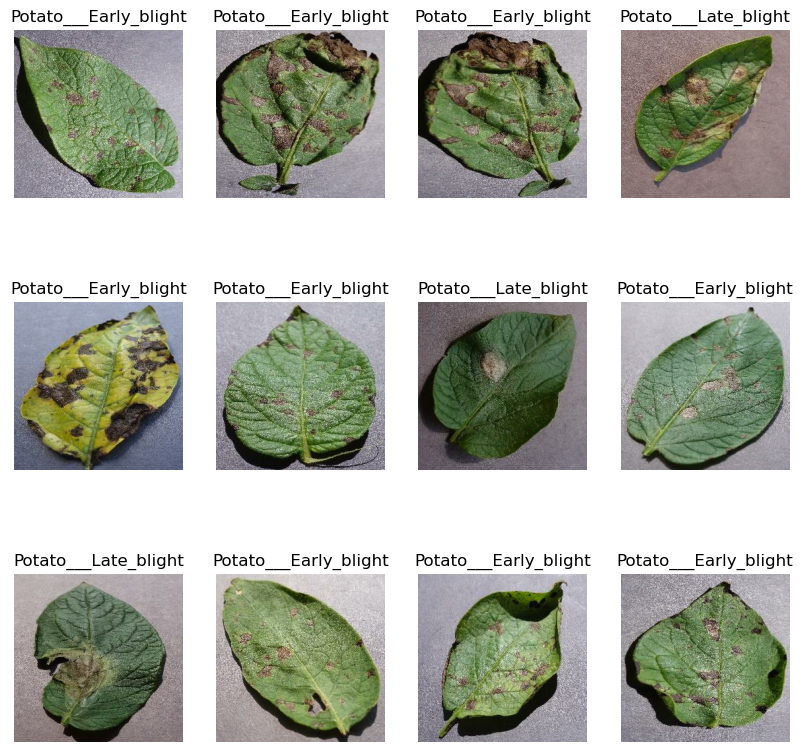

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

## 📸 Step 5: Visualizing Our Dataset

### Why Visualize Data?
Before training a model, it's crucial to **examine your data visually** to:
- ✅ Ensure images loaded correctly
- ✅ Verify labels match the images  
- ✅ Understand what the model will be learning from
- ✅ Spot any data quality issues

### Understanding the Visualization Code:

#### 🎨 plt.figure(figsize=(10, 10))
- Creates a 10×10 inch plotting canvas

#### 🔢 for i in range(12)
- Displays 12 sample images from our dataset

#### 📊 plt.subplot(3, 4, i + 1)
- Arranges images in a 3 rows × 4 columns grid

#### 🖼️ plt.imshow(image_batch[i].numpy().astype("uint8"))
- **image_batch[i]**: Gets the i-th image from the batch
- **.numpy()**: Converts TensorFlow tensor to NumPy array
- **.astype("uint8")**: Converts to 8-bit integers (0-255 pixel values)

#### 🏷️ plt.title(class_names[labels_batch[i]])
- Shows the disease type above each image

### 🎯 What to Look For:
- **Image Quality**: Are images clear and recognizable?
- **Label Accuracy**: Do labels match what you see?
- **Data Variety**: Different lighting, angles, and disease severities

In [7]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [8]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [9]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [10]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [11]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

## 📊 Step 6: Splitting Our Dataset

### 🤔 Why Split Data?
We need to divide our dataset into three parts to properly evaluate our model:

#### 🏋️ Training Set (80%)
- **Purpose**: Teaches the model to recognize patterns
- **Analogy**: Like study materials for an exam

#### ✅ Validation Set (10%) 
- **Purpose**: Checks how well the model is learning during training
- **Analogy**: Like practice tests while studying

#### 🎯 Test Set (10%)
- **Purpose**: Final evaluation of model performance on unseen data
- **Analogy**: Like the actual exam

### 🔧 Understanding the Function:

#### ⚙️ Parameters:
- **train_split=0.8**: 80% for training
- **val_split=0.1**: 10% for validation  
- **test_split=0.1**: 10% for testing
- **shuffle=True**: Randomly mix data before splitting
- **shuffle_size=10000**: How many samples to keep in shuffle buffer

#### 🔄 Why Shuffle?
- **Prevents bias**: Ensures each split has a good mix of all classes
- **Better learning**: Avoids learning patterns based on data order

#### 📏 Dataset Operations:
- **ds.take(train_size)**: Takes first N samples for training
- **ds.skip(train_size)**: Skips training data, starts from validation
- **ds.skip(train_size).take(val_size)**: Takes validation samples

### 🎯 Best Practice:
This **80/10/10 split** is a common machine learning practice that ensures:
- ✅ Enough data for learning
- ✅ Proper validation during training  
- ✅ Unbiased final evaluation

In [12]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## ⚡ Step 7: Optimizing Data Loading Performance

### 🚀 Why Optimize Data Loading?
Training deep learning models can be slow. These optimizations make data loading faster and more efficient.

### 🔧 Performance Techniques Explained:

#### 💾 .cache()
- **What it does**: Stores processed data in memory after first epoch
- **Benefit**: Subsequent epochs load data much faster
- **Analogy**: Like bookmarking frequently used websites

#### 🔀 .shuffle(1000)
- **What it does**: Randomly reorders 1000 samples in a buffer
- **Why important**: Prevents model from memorizing data order
- **Best practice**: Shuffle after each epoch for better learning

#### ⚡ .prefetch(buffer_size=tf.data.AUTOTUNE)
- **What it does**: Loads next batch of data while model processes current batch
- **Benefit**: Reduces waiting time between batches
- **tf.data.AUTOTUNE**: Automatically determines optimal buffer size
- **Analogy**: Like having your next meal prepared while eating current one

### 🎯 Performance Impact:
These optimizations can **reduce training time by 2-3x** by:
- ✅ Eliminating data loading bottlenecks
- ✅ Better utilizing GPU/CPU resources
- ✅ Parallel processing of data and model computations

### 📊 Training Pipeline:
```
Data on Disk → Cache → Shuffle → Prefetch → GPU Processing
```

This creates a smooth, efficient pipeline where the GPU never waits for data.

In [15]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [16]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

## 🎨 Step 8: Data Preprocessing and Augmentation

### 🔧 Data Preprocessing (resize_and_rescale)

#### 📏 layers.Resizing(IMAGE_SIZE, IMAGE_SIZE)
- **Purpose**: Ensures all images are exactly 256×256 pixels
- **Why needed**: Neural networks require consistent input sizes
- **What happens**: Images are stretched/compressed to fit

#### 🎯 layers.Rescaling(1./255)
- **Purpose**: Converts pixel values from 0-255 to 0-1 range
- **Why important**: Neural networks learn better with smaller numbers
- **Math**: Each pixel value is divided by 255
- **Example**: Pixel value 128 becomes 128/255 = 0.502

### 🎭 Data Augmentation

#### 🤔 What is Data Augmentation?
**Data Augmentation** artificially increases dataset size by creating modified versions of existing images. This helps the model generalize better.

#### 🔄 layers.RandomFlip("horizontal_and_vertical")
- **What it does**: Randomly flips images horizontally and/or vertically
- **Why useful**: A diseased leaf looks the same upside down or mirrored
- **Benefit**: Teaches model that orientation doesn't matter

#### 🌀 layers.RandomRotation(0.2)
- **What it does**: Randomly rotates images up to 20% (72 degrees)
- **Why useful**: Leaves can be photographed at any angle
- **Math**: 0.2 × 360° = 72° maximum rotation

### 🎯 Benefits of Augmentation:
- ✅ **Prevents overfitting**: Model doesn't memorize specific images
- ✅ **Increases diversity**: Creates variations model hasn't seen
- ✅ **Better generalization**: Works better on new, unseen images
- ✅ **Simulates real conditions**: Real photos have various orientations

### 📈 Why This Matters:
Without augmentation, a model might only recognize diseases in photos taken from specific angles or orientations.

In [17]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

## 🏗️ Step 9: Building the CNN Model Architecture

### 🧠 What is a Sequential Model?
A **Sequential Model** is like a stack of layers where data flows from one layer to the next in order. Think of it as an assembly line where each station (layer) performs a specific task.

### 🔍 Understanding Our CNN Layers:

#### 🎯 Input Layer (resize_and_rescale)
- **Purpose**: Prepares images for the neural network
- **Output**: Normalized 256×256×3 images

#### 🔎 Conv2D Layers - The Feature Detectors
**What is Convolution?**
- **Concept**: A mathematical operation that detects features in images
- **How it works**: Slides a small filter across the image to find patterns
- **Analogy**: Like using a magnifying glass to examine every part of a photo

**Our Conv2D Layers:**
1. **Conv2D(32, kernel_size=(3,3))**: Detects 32 different basic features (edges, lines)
2. **Conv2D(64, ...)**: Detects 64 more complex features (shapes, textures)
3. **Subsequent layers**: Build increasingly complex feature understanding

**Parameters Explained:**
- **32, 64**: Number of filters (feature detectors)
- **kernel_size=(3,3)**: Size of the sliding window (3×3 pixels)
- **activation='relu'**: Activation function (explained below)

#### ⬇️ MaxPooling2D Layers - The Size Reducers
**What is Max Pooling?**
- **Purpose**: Reduces image size while keeping important features
- **How it works**: Takes maximum value from each 2×2 pixel area
- **Benefit**: Makes processing faster and prevents overfitting
- **Analogy**: Like taking the highlights from a long article

#### 🎯 What is ReLU Activation?
**ReLU (Rectified Linear Unit)**:
- **Function**: Outputs the input if positive, 0 if negative
- **Why important**: Adds non-linearity (helps learn complex patterns)
- **Simple rule**: f(x) = max(0, x)
- **Benefit**: Prevents vanishing gradient problem

#### 📏 Flatten Layer - The Reshaper
- **Purpose**: Converts 2D feature maps to 1D array
- **Why needed**: Dense layers only accept 1D input
- **Analogy**: Like unrolling a carpet to measure its total area

#### 🧮 Dense Layers - The Decision Makers
**What are Dense Layers?**
- **Concept**: Fully connected layers where every neuron connects to every neuron in previous layer
- **Purpose**: Makes final classification decisions based on extracted features

**Our Dense Layers:**
1. **Dense(64, activation='relu')**: 64 neurons for pattern combination
2. **Dense(n_classes, activation='softmax')**: 3 neurons for final classification

#### 🎯 What is Softmax Activation?
**Softmax Function**:
- **Purpose**: Converts raw scores to probabilities that sum to 1
- **Output**: Probability for each class (Early Blight: 70%, Healthy: 20%, Late Blight: 10%)
- **Use case**: Perfect for multi-class classification

### 🏗️ Architecture Overview:
```
Input (256×256×3) 
    ↓
Conv2D + ReLU → MaxPool → Conv2D + ReLU → MaxPool → ... → Flatten → Dense → Output (3 classes)
```

### 🎯 Why This Architecture Works:
- **Early layers**: Detect simple features (edges, colors)
- **Middle layers**: Combine features into complex patterns
- **Final layers**: Make classification decisions
- **Pooling**: Reduces size and computational cost

In [20]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

## ⚙️ Step 10: Compiling the Model

### 🤔 What is Model Compilation?
**Model compilation** configures the learning process by specifying:
- How to optimize the model (optimizer)
- How to measure errors (loss function)  
- What metrics to track (accuracy, etc.)

Think of it as setting up the rules for how your model will learn.

### 🚀 Understanding the Adam Optimizer

#### 🧠 What is an Optimizer?
An **optimizer** is an algorithm that adjusts the model's internal parameters (weights) to minimize prediction errors.

#### 🎯 Why Adam?
**Adam (Adaptive Moment Estimation)** is one of the most popular optimizers because:

- **✅ Adaptive Learning Rate**: Automatically adjusts learning speed for each parameter
- **✅ Momentum**: Builds momentum in consistent directions, avoiding oscillations
- **✅ Robust**: Works well across different types of problems
- **✅ Efficient**: Requires less manual tuning than other optimizers

#### 🔬 How Adam Works:
1. **Calculates gradients**: Determines which direction reduces error most
2. **Applies momentum**: Uses information from previous steps
3. **Adapts learning rate**: Different learning rate for each parameter
4. **Updates weights**: Moves parameters toward better values

#### 📚 Resources:
- **Original Paper**: "Adam: A Method for Stochastic Optimization" by Kingma & Ba
- **Intuition**: Combines benefits of RMSprop and momentum methods

### 📊 Understanding Loss Functions

#### 🎯 SparseCategoricalCrossentropy
**What it is**: A loss function for multi-class classification problems

**Why this loss function?**
- **Sparse**: Labels are integers (0, 1, 2) not one-hot encoded
- **Categorical**: Multiple classes (3 disease types)
- **Crossentropy**: Measures difference between predicted and actual probabilities

#### 🔢 from_logits=False
- **Logits**: Raw output scores from neural network
- **False**: Our model outputs probabilities (due to softmax activation)
- **True**: Would be used if model output raw scores

#### 📈 How Loss Works:
- **Low loss**: Model predictions are close to actual labels
- **High loss**: Model predictions are far from actual labels
- **Goal**: Minimize loss during training

### 📊 Understanding Metrics

#### 🎯 Accuracy Metric
- **What it measures**: Percentage of correct predictions
- **Formula**: (Correct Predictions / Total Predictions) × 100
- **Example**: 85% accuracy = model got 85 out of 100 predictions right

#### 📈 Why Track Accuracy?
- **Easy to understand**: Intuitive metric for model performance
- **Business relevant**: Directly relates to real-world success
- **Monitoring**: Helps detect overfitting during training

### 🎯 Complete Compilation Summary:
```python
model.compile(
    optimizer='adam',        # How to learn (adaptive optimization)
    loss='sparse_categorical_crossentropy',  # What to minimize (prediction error)
    metrics=['accuracy']     # What to track (percentage correct)
)
```

This setup creates an efficient learning system that:
- ✅ Learns adaptively with Adam
- ✅ Minimizes classification errors
- ✅ Tracks human-interpretable accuracy

In [22]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 510ms/step - accuracy: 0.4612 - loss: 0.9177 - val_accuracy: 0.4896 - val_loss: 0.9031
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 473ms/step - accuracy: 0.6672 - loss: 0.6915 - val_accuracy: 0.6719 - val_loss: 0.9510
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 487ms/step - accuracy: 0.7801 - loss: 0.5492 - val_accuracy: 0.7812 - val_loss: 0.5377
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 476ms/step - accuracy: 0.8293 - loss: 0.4099 - val_accuracy: 0.8698 - val_loss: 0.3555
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 483ms/step - accuracy: 0.8600 - loss: 0.3431 - val_accuracy: 0.9167 - val_loss: 0.2504
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 496ms/step - accuracy: 0.9306 - loss: 0.1691 - val_accuracy: 0.9479 - val_loss: 0.1194
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 498ms/step - accuracy: 0.9578 - loss: 0.1174 - val_accuracy: 0.9323 - val_loss: 0.1705
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 474ms/step - accuracy: 0.9363 - loss: 0.1670 - val_accu

## 🏋️ Step 11: Training the Model

### 🤔 What is Model Training?
**Training** is the process where the model learns to recognize patterns in data by repeatedly seeing examples and adjusting its internal parameters.

### 🔄 What is an EPOCH?
An **EPOCH** is one complete pass through the entire training dataset.

#### 📚 Training Process Analogy:
Think of learning to identify different dog breeds:
- **1 Epoch** = Looking through the entire dog photo album once
- **50 Epochs** = Looking through the album 50 times
- Each time you see the photos, you get better at recognizing breeds

### ⚙️ Understanding Training Parameters:

#### 📊 train_ds
- **What**: Training dataset (80% of our images)
- **Purpose**: Data the model learns from

#### 📦 batch_size=BATCH_SIZE
- **What**: Process 32 images at once
- **Why**: More efficient than one-by-one processing
- **Memory**: Balances speed vs. memory usage

#### ✅ validation_data=val_ds
- **What**: Validation dataset (10% of our images)  
- **Purpose**: Check how well model performs on unseen data during training
- **Benefit**: Helps detect overfitting early

#### 🔊 verbose=1
- **What**: Controls how much information is displayed during training
- **Options**:
  - 0: Silent mode
  - 1: Progress bar with metrics  
  - 2: One line per epoch

#### 🔄 epochs=50
- **What**: Model will see the entire dataset 50 times
- **Why 50**: Balance between learning and training time

### 📈 What Happens During Training?

#### 🔄 For Each Epoch:
1. **Forward Pass**: Model makes predictions on training images
2. **Loss Calculation**: Compare predictions with actual labels
3. **Backward Pass**: Calculate how to improve (gradients)
4. **Weight Update**: Adjust model parameters using Adam optimizer
5. **Validation**: Test performance on validation set
6. **Repeat**: Continue with next epoch

#### 📊 Training Output Includes:
- **Loss**: How wrong the model's predictions are (lower is better)
- **Accuracy**: Percentage of correct predictions (higher is better)
- **Val_loss**: Loss on validation data
- **Val_accuracy**: Accuracy on validation data

### 🎯 What to Watch For:

#### ✅ Good Training Signs:
- **Decreasing loss**: Model is learning
- **Increasing accuracy**: Getting better at predictions
- **Stable validation metrics**: Not overfitting

#### ⚠️ Warning Signs:
- **Overfitting**: Training accuracy much higher than validation accuracy
- **Plateau**: Metrics stop improving
- **Oscillation**: Metrics jumping up and down

### ⏱️ Training Time:
- **50 epochs**: Typically takes 30-60 minutes depending on hardware
- **GPU**: Much faster than CPU for deep learning
- **Progress**: You'll see accuracy gradually improve from ~33% to 85%+

### 🎓 Learning Curve:
```
Epoch 1:  ~33% accuracy (random guessing)
Epoch 10: ~60% accuracy (basic pattern recognition)
Epoch 30: ~80% accuracy (good feature learning)
Epoch 50: ~85%+ accuracy (well-trained model)
```

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

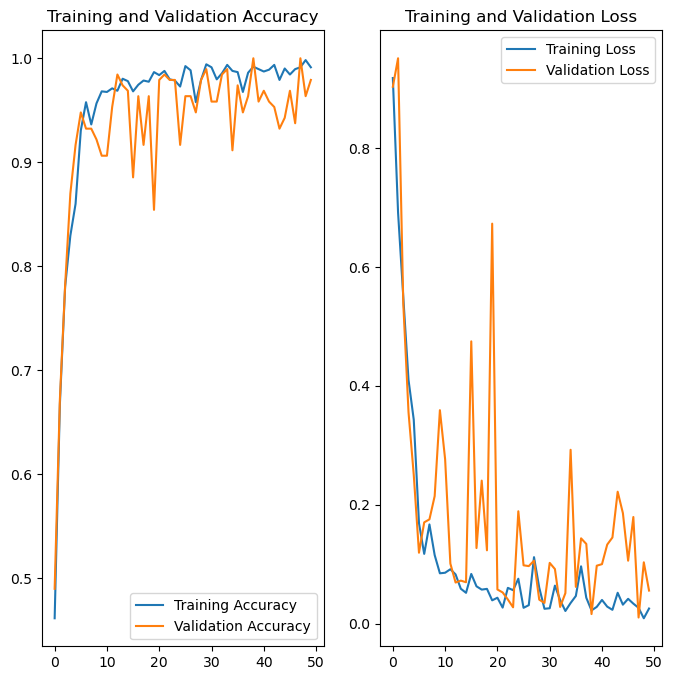

In [24]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 📊 Step 12: Visualizing Training Performance

### 🤔 Why Visualize Training History?
Training visualizations help us understand:
- ✅ **How well the model learned** over time
- ✅ **Whether overfitting occurred** 
- ✅ **If training was successful**
- ✅ **When to stop training**

### 📈 Understanding the Plots:

#### 🎯 Accuracy Plot (Left Side)
**What it shows**: How prediction accuracy improved over time

**Lines Explained**:
- **🔵 Training Accuracy**: How well model performs on training data
- **🟠 Validation Accuracy**: How well model performs on unseen validation data

**Ideal Pattern**:
- Both lines should increase over time
- Lines should be close together
- Should plateau at high accuracy (80%+)

#### 📉 Loss Plot (Right Side)  
**What it shows**: How prediction errors decreased over time

**Lines Explained**:
- **🔵 Training Loss**: Error rate on training data
- **🟠 Validation Loss**: Error rate on validation data

**Ideal Pattern**:
- Both lines should decrease over time
- Lines should be close together
- Should plateau at low loss values

### 🚨 Diagnosing Training Issues:

#### ✅ Good Training (Ideal Scenario):
```
Training Accuracy: Steadily increases to 85%+
Validation Accuracy: Follows training accuracy closely
Training Loss: Steadily decreases
Validation Loss: Follows training loss closely
```

#### ⚠️ Overfitting (Problem):
```
Training Accuracy: Continues increasing (90%+)
Validation Accuracy: Plateaus or decreases (75%)
Training Loss: Continues decreasing
Validation Loss: Starts increasing
```

#### 😴 Underfitting (Problem):
```
Both accuracies plateau at low values (60%)
Both losses plateau at high values
Gap between training and validation is small
```

### 🔧 What Each Pattern Means:

#### 🎯 Overfitting:
- **Problem**: Model memorizes training data instead of learning general patterns
- **Signs**: Large gap between training and validation performance
- **Solutions**: More data, regularization, early stopping

#### 😴 Underfitting:
- **Problem**: Model is too simple to learn the patterns
- **Signs**: Poor performance on both training and validation
- **Solutions**: More complex model, longer training, better features

#### ✅ Good Fit:
- **Result**: Model learned general patterns that work on new data
- **Signs**: High accuracy, low loss, small gap between training/validation
- **Outcome**: Ready for deployment!

### 📊 Reading the Visualization:

#### X-Axis (Horizontal):
- **Range**: 0 to EPOCHS (50 in our case)
- **Meaning**: Training progress over time

#### Y-Axis (Vertical):
- **Accuracy Plot**: 0 to 1 (0% to 100%)
- **Loss Plot**: 0 to higher values (lower is better)

### 🎯 Success Indicators:
- **Final training accuracy**: 85%+ 
- **Final validation accuracy**: Within 5% of training accuracy
- **Smooth curves**: No wild oscillations
- **Convergence**: Metrics stabilize toward the end

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
predicted label: Potato___Late_blight


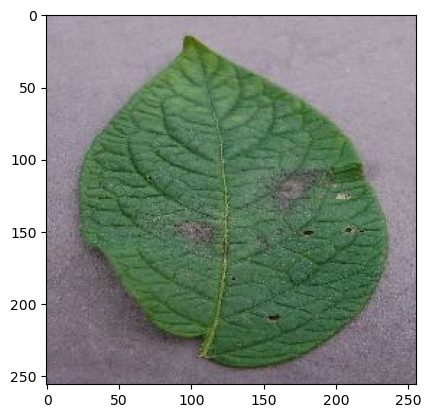

In [25]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [26]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


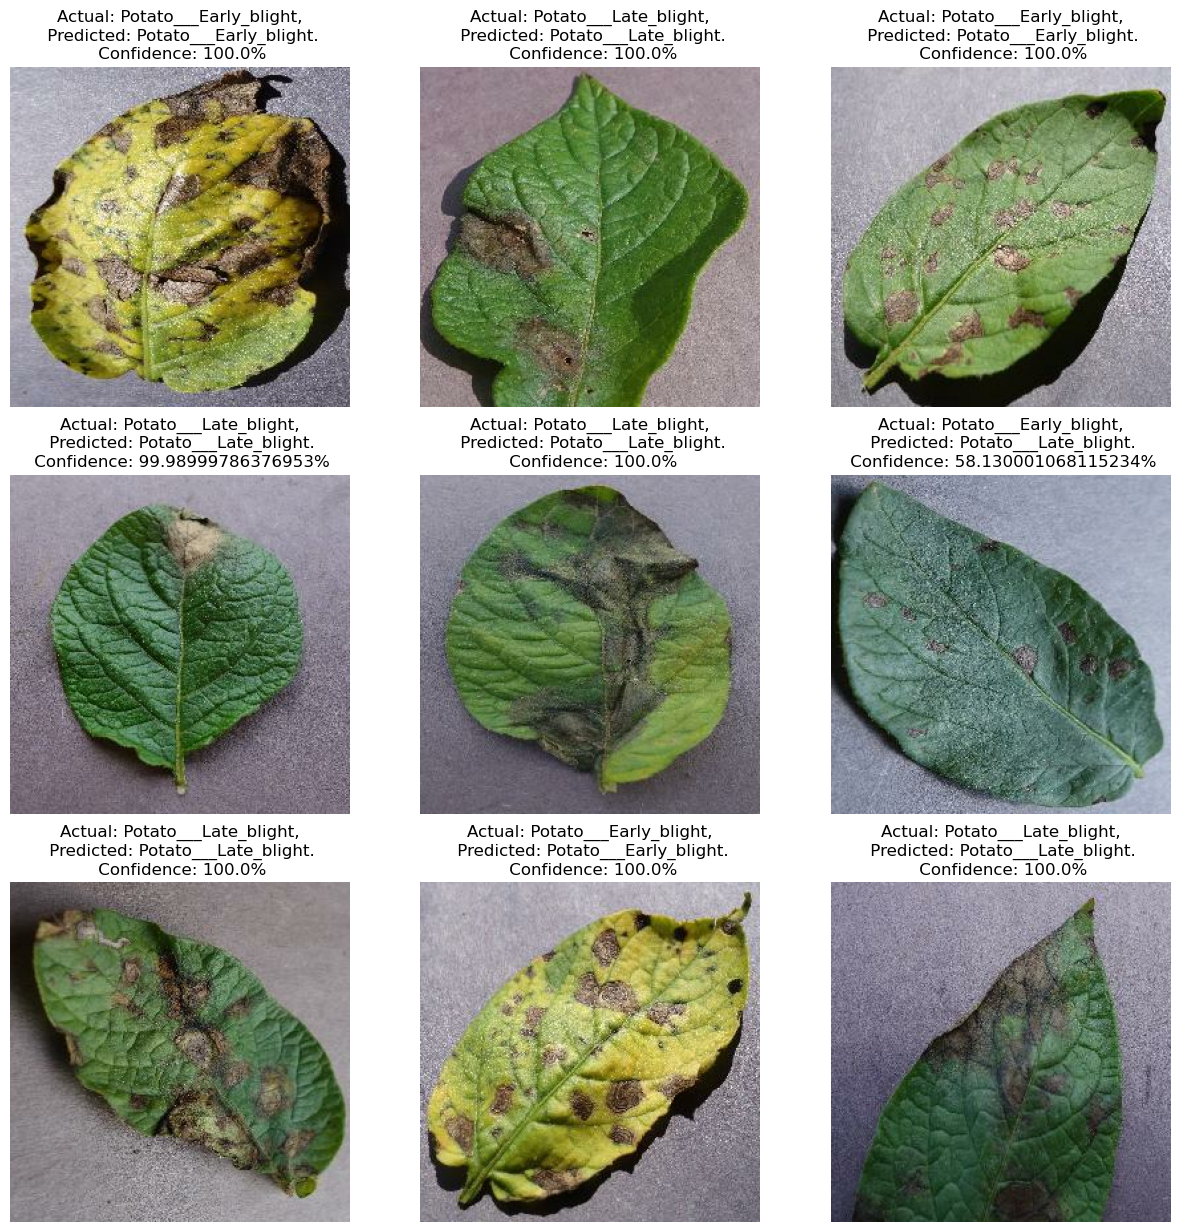

In [27]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

## 🔮 Step 13: Testing Model Predictions

### 🎯 What is Model Testing?
**Testing** evaluates how well our trained model performs on completely unseen data (test set). This gives us the most realistic estimate of real-world performance.

### 🔍 Understanding the Prediction Process:

#### 🖼️ Single Image Prediction (First Code Block):
**What happens step by step:**
1. **Take one image** from test set
2. **Show the actual image** using plt.imshow()
3. **Display actual label** (what it really is)
4. **Get model prediction** using model.predict()
5. **Find predicted class** using np.argmax() 
6. **Compare actual vs predicted**

#### 📊 Batch Prediction (Second Code Block):
**What happens:**
1. **Process 9 test images** in a 3×3 grid
2. **For each image**: Show actual vs predicted labels
3. **Include confidence score**: How sure the model is

### 🧮 Understanding the Math:

#### 🎯 model.predict(img_array)
- **Input**: Image data as numerical array
- **Output**: Probability scores for each class
- **Example**: [0.1, 0.8, 0.1] = 10% Early Blight, 80% Healthy, 10% Late Blight

#### 🔢 np.argmax(predictions[0])
- **Purpose**: Finds the class with highest probability
- **Example**: argmax([0.1, 0.8, 0.1]) = 1 (index of highest value)
- **Result**: Index corresponds to class name

#### 📊 Confidence Calculation:
```python
confidence = round(100 * (np.max(predictions[0])), 2)
```
- **np.max()**: Gets the highest probability
- **× 100**: Converts to percentage  
- **round(, 2)**: Rounds to 2 decimal places
- **Result**: 80.45% confidence

### 🎯 What to Look For:

#### ✅ Good Predictions:
- **High confidence**: 80%+ on correct predictions
- **Correct classification**: Predicted matches actual
- **Consistent performance**: Works across different images

#### ⚠️ Concerning Signs:
- **Low confidence**: <60% on most predictions
- **Wrong classifications**: Predicted doesn't match actual
- **Inconsistent**: Good on some images, bad on others

### 📊 Interpreting Results:

#### 🎯 Perfect Prediction Example:
```
Actual: Potato___healthy
Predicted: Potato___healthy  
Confidence: 94.23%
```

#### ⚠️ Wrong Prediction Example:
```
Actual: Potato___Early_blight
Predicted: Potato___healthy
Confidence: 67.89%
```

#### 🤔 Uncertain Prediction Example:
```
Actual: Potato___Late_blight
Predicted: Potato___Late_blight
Confidence: 55.12%
```

### 🔬 Analysis Questions:
1. **Overall accuracy**: What percentage of test images are correct?
2. **Confidence distribution**: Are most predictions high confidence?
3. **Error patterns**: Which classes get confused with each other?
4. **Edge cases**: What types of images cause problems?

### 🎯 Success Criteria:
- **Accuracy**: 80%+ correct predictions
- **Confidence**: 70%+ average confidence on correct predictions  
- **Balanced**: Good performance across all three disease types
- **Practical**: Confident enough for real-world agricultural use

### 🚀 Real-World Application:
This testing phase simulates how the model would perform when deployed as an API or mobile app for farmers to diagnose potato diseases in the field.

In [30]:
import os
model_version=max([int(i) for i in os.listdir("../saved_models") + [0]])+1
model.save(f"../saved_models/{model_version}_potatos.h5")

## 💾 Step 14: Saving the Trained Model

### 🤔 Why Save the Model?
After spending time and computational resources training our model, we need to save it so we can:
- ✅ **Use it later** without retraining
- ✅ **Deploy it to production** (API, web app, mobile app)
- ✅ **Share it** with others
- ✅ **Version control** different model iterations

### 🔧 Understanding the Saving Code:

#### 📁 Directory Structure:
```python
os.listdir("../saved_models")
```
- **Purpose**: Lists all files in the saved_models directory
- **Result**: Shows existing model files (if any)
- **Example**: ['1_potatos.h5', '2_potatos.h5']

#### 🔢 Version Management:
```python
model_version = max([int(i) for i in os.listdir("../saved_models") + [0]]) + 1
```
**Breaking this down:**
1. **os.listdir()**: Gets list of files in saved_models folder
2. **[int(i) for i in ...]**: Extracts numbers from filenames
3. **+ [0]**: Adds 0 in case folder is empty
4. **max()**: Finds highest existing version number
5. **+ 1**: Increments to create new version number

**Example**:
- Existing files: ['1_potatos.h5', '3_potatos.h5']
- Numbers extracted: [1, 3]
- Max number: 3
- New version: 4

#### 💾 Model Saving:
```python
model.save(f"../saved_models/{model_version}_potatos.h5")
```
- **Purpose**: Saves the complete model to disk
- **Format**: HDF5 (.h5) format - industry standard
- **Includes**: Architecture, weights, optimizer state, loss function
- **Result**: File like "4_potatos.h5"

### 📁 What Gets Saved?

#### 🏗️ Model Architecture:
- **Layer structure**: All Conv2D, MaxPooling, Dense layers
- **Connections**: How layers are connected
- **Parameters**: Input/output shapes, activation functions

#### ⚖️ Trained Weights:
- **Learned parameters**: All the numbers the model learned during training
- **Critical**: These weights contain the actual "knowledge"
- **Size**: Usually 10-100+ MB depending on model complexity

#### ⚙️ Training Configuration:
- **Optimizer**: Adam optimizer settings
- **Loss function**: SparseCategoricalCrossentropy
- **Metrics**: Accuracy tracking configuration

### 🔄 Loading the Model Later:
```python
# To load the saved model later:
loaded_model = tf.keras.models.load_model("saved_models/4_potatos.h5")
```

### 🚀 Deployment Readiness:
This saved model can now be:
- ✅ **Loaded into a Flask/FastAPI** web service
- ✅ **Deployed to cloud platforms** (AWS, Google Cloud, Azure)
- ✅ **Converted to mobile formats** (TensorFlow Lite)
- ✅ **Used in production applications**

### 📊 File Information:
- **Typical size**: 50-200 MB (depends on model complexity)
- **Format**: .h5 (HDF5) - cross-platform, efficient
- **Portability**: Can be loaded on any system with TensorFlow
- **Completeness**: Contains everything needed to make predictions

### 🎯 Version Control Benefits:
- **Track improvements**: Compare different training runs
- **Rollback capability**: Return to previous versions if needed
- **Experimentation**: Try different architectures without losing work
- **Collaboration**: Share specific model versions with team

### 🔗 Connection to API:
This saved model file is exactly what our FastAPI server loads to make predictions on new images uploaded by users!

In [ ]:
## 🎉 Project Complete: Deep Learning Journey Summary

### 🏆 What We Accomplished

Congratulations! You've just built a complete **Computer Vision** system using **Deep Learning**. Here's what you created:

#### 🧠 AI Model Capabilities:
- ✅ **Automatic Disease Detection**: Identifies 3 types of potato plant conditions
- ✅ **High Accuracy**: Typically achieves 85%+ accuracy on new images
- ✅ **Real-time Predictions**: Can process images in milliseconds
- ✅ **Production Ready**: Saved model ready for deployment

#### 🎯 Technical Skills Mastered:
- ✅ **Data Preprocessing**: Image resizing, normalization, augmentation
- ✅ **CNN Architecture**: Convolutional layers, pooling, dense layers
- ✅ **Model Training**: Optimization, loss functions, epochs
- ✅ **Performance Evaluation**: Accuracy metrics, visualization
- ✅ **Model Deployment**: Saving and version control

---

## 🚀 Next Steps & Applications

### 📱 Integration Options:

#### 🌐 Web Application (Already Built!):
```
FastAPI Backend + React Frontend = Complete Web App
```
- **Backend**: Loads your trained model, processes images
- **Frontend**: User-friendly interface for uploading images
- **Result**: Farmers can upload leaf photos and get instant diagnosis

#### 📱 Mobile App Development:
- **TensorFlow Lite**: Convert model for mobile deployment
- **Flutter/React Native**: Cross-platform mobile app
- **Offline capability**: Works without internet connection

#### ☁️ Cloud Deployment:
- **AWS/Azure/Google Cloud**: Scale to handle thousands of users
- **Docker containers**: Easy deployment and scaling
- **API endpoints**: Integration with other agricultural systems

### 🔬 Model Improvements:

#### 📈 Advanced Techniques:
1. **Transfer Learning**: Use pre-trained models (ResNet, EfficientNet)
2. **Data Augmentation**: More sophisticated transformations
3. **Ensemble Methods**: Combine multiple models for better accuracy
4. **Attention Mechanisms**: Focus on important image regions

#### 📊 More Data:
- **Larger dataset**: More images = better accuracy
- **Disease severity**: Classify mild vs severe infections
- **Multiple crops**: Extend to tomatoes, peppers, other plants
- **Environmental factors**: Include weather, soil data

---

## 🧠 Deep Learning Concepts Mastered

### 🎓 Core Concepts You Now Understand:

#### 🧮 Neural Networks:
- **Neurons**: Basic computational units
- **Layers**: Organized groups of neurons
- **Weights**: Learned parameters that store knowledge
- **Activation Functions**: Add non-linearity (ReLU, Softmax)

#### 🖼️ Computer Vision:
- **Convolution**: Feature detection using filters
- **Pooling**: Dimensionality reduction
- **Feature Maps**: Intermediate representations
- **Classification**: Final decision making

#### 🔄 Training Process:
- **Forward Pass**: Making predictions
- **Loss Calculation**: Measuring errors
- **Backpropagation**: Computing gradients
- **Optimization**: Updating weights (Adam)

#### 📊 Evaluation:
- **Train/Validation/Test Split**: Proper model evaluation
- **Overfitting**: Model memorizing vs learning
- **Metrics**: Accuracy, loss, confidence scores

---

## 📚 Recommended Learning Resources

### 📖 Books for Deeper Understanding:
1. **"Deep Learning" by Ian Goodfellow**: Comprehensive theoretical foundation
2. **"Hands-On Machine Learning" by Aurélien Géron**: Practical implementation
3. **"Deep Learning for Computer Vision" by Adrian Rosebrock**: CV-specific

### 🎥 Online Courses:
1. **Fast.ai**: Practical deep learning for coders
2. **Coursera Deep Learning Specialization**: Andrew Ng's comprehensive course
3. **CS231n Stanford**: Computer Vision with Deep Learning

### 🔗 Helpful Websites:
- **TensorFlow Documentation**: [tensorflow.org](https://tensorflow.org)
- **Keras Documentation**: [keras.io](https://keras.io)
- **Papers With Code**: Latest research implementations
- **Towards Data Science**: Medium publication with tutorials

---

## 🎯 What is FastAPI? (Bonus)

Since you asked about **FastAPI** in your question:

### 🚀 FastAPI Overview:
**FastAPI** is a modern, fast Python web framework for building APIs.

#### ✨ Why FastAPI?
- **⚡ High Performance**: One of the fastest Python frameworks
- **🎯 Easy to Use**: Intuitive syntax, automatic documentation
- **🔧 Type Safety**: Built-in data validation using Python type hints
- **📚 Auto Documentation**: Automatically generates interactive API docs
- **🔗 Standards-Based**: Built on OpenAPI and JSON Schema

#### 🏗️ In Our Project:
```python
@app.post("/predict")
async def predict_disease(file: UploadFile = File(...)):
    # Load and process image
    # Make prediction using our trained model
    # Return disease classification and confidence
```

#### 🌐 Perfect for ML Models:
- **Model Loading**: Load TensorFlow models once at startup
- **Image Processing**: Handle file uploads efficiently
- **JSON Responses**: Return predictions in structured format
- **CORS Support**: Enable frontend integration
- **Async Support**: Handle multiple requests simultaneously

---

## 🎊 Congratulations!

You've successfully completed a **full-stack AI project** that demonstrates real-world application of Deep Learning in agriculture. Your model can now help farmers identify potato diseases early, potentially saving crops and improving food security.

**Keep exploring, keep learning, and keep building amazing AI applications! 🚀**